In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

c:\Users\Prashanth\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\Prashanth\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\Prashanth\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\Prashanth\anaconda3\envs\testenv\lib\site-pack

# First Sperate a portion of data for testing

In [4]:
#before doing these please make a folder as train data and in the train folder create another six folder for six defects
#These six folder should have 300 images.
try:
    source1 = "NEU/train"
    os.mkdir("NEU/test")
    dest11 = "NEU/test"
    files = os.listdir(source1)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.08)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory. You don't need to run this cell")


Everything already have in the directory. You don't need to run this cell


## Now divide the test data into test and validation data

In [6]:
try:
    source1 = "NEU/test"
    os.mkdir("MAIN/NEU/valid")
    dest11 = "NEU/valid"
    files = os.listdir(source1)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.5)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory. You don't need to run this cell")


Everything already have in the directory. You don't need to run this cell


In [7]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'NEU/train',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        'NEU/valid',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.


Found 72 images belonging to 6 classes.


In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.978 ):
            print("\nReached 97.8% accuracy so cancelling training!")
            self.model.stop_training = True 

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [11]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=15,
        validation_data=validation_generator,
        callbacks=[callbacks]
        verbose=1, shuffle=True)

Epoch 1/15
166/166 [==============================] - 191s 1s/step - loss: 1.8870 - accuracy: 0.2965 - val_loss: 1.5425 - val_accuracy: 0.4306
Epoch 2/15
166/166 [==============================] - 114s 674ms/step - loss: 1.0624 - accuracy: 0.6147 - val_loss: 1.5250 - val_accuracy: 0.3472
Epoch 3/15
166/166 [==============================] - 114s 683ms/step - loss: 0.7284 - accuracy: 0.7337 - val_loss: 0.4347 - val_accuracy: 0.9306
Epoch 4/15
166/166 [==============================] - 112s 672ms/step - loss: 0.6267 - accuracy: 0.7923 - val_loss: 0.2417 - val_accuracy: 0.9028
Epoch 5/15
166/166 [==============================] - 109s 657ms/step - loss: 0.4998 - accuracy: 0.8357 - val_loss: 0.1110 - val_accuracy: 0.9861
Epoch 6/15
166/166 [==============================] - 110s 660ms/step - loss: 0.4621 - accuracy: 0.8442 - val_loss: 0.1891 - val_accuracy: 0.9583
Epoch 7/15
166/166 [==============================] - 112s 673ms/step - loss: 0.4162 - accuracy: 0.8629 - val_loss: 0.4920 - va

<!-- we have achieved a accuracy of 90 percentage -->

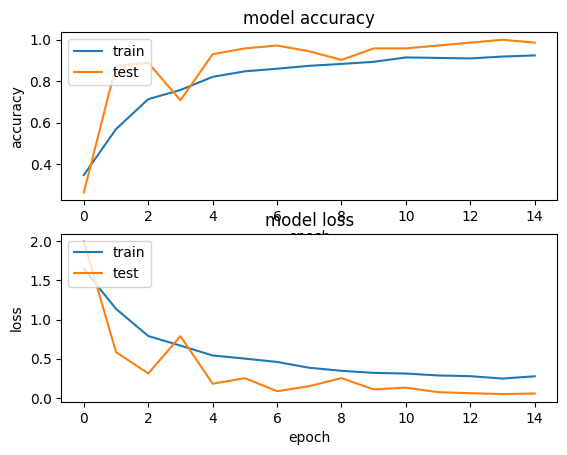

In [9]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()


In [1]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Define your target labels (replace with your actual labels)
target_labels = ["crazing", "inclusion","patches","pitted","rolled","scratches"]

# Capture user input image (this step depends on your application)
user_input_image_path = 'Sc_12.bmp'  # Replace with the actual path to the user's image

# Load and preprocess the user input image
user_input_image = img_to_array(load_img(user_input_image_path, target_size=(200, 200)))
user_input_image = user_input_image.astype('float32') / 255

# Make predictions using your pre-trained model
user_input_image = np.expand_dims(user_input_image, axis=0)  # Add batch dimension
prediction = model.predict(user_input_image)

# Get the defect type based on the prediction
defect_type = target_labels[np.argmax(prediction)]

# Display the input image and the predicted defect type to the user
print(f"Predicted defect type: {defect_type}")



NameError: name 'model' is not defined